In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.regularizers import l1, l2
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


## 1. Cargado de datos de las simulaciones
### X = Lista con todos los valores del EEG (|AMPA| + |GABA|) 
### Y = Radio de conductancias g ([g_exc/g_inh), External rates v_0 (1.5, 2.5)

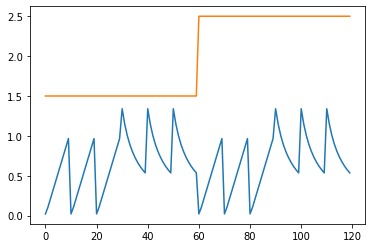

In [3]:
#30 exc_exc y 30 inh_exc, ext parameter 1.5
X = []
for trial in range(3):
    for k in np.arange(0,0.25,0.025):
        if(k==0):
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent(0.005)-'+str(trial+1)+'-0_rate_1.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent(0.005)-'+str(trial+1)+'-0_rate_1.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))
        else:
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent('+"{:.3f}".format(k)+')-'+str(trial+1)+'-0_rate_1.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent('+"{:.3f}".format(k)+')-'+str(trial+1)+'-0_rate_1.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))
            
for trial in range(3):
    for k in np.arange(1.50,4,0.25):
        if(k==0):
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-0.05)-'+str(trial+1)+'-0_rate_1.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-0.05)-'+str(trial+1)+'-0_rate_1.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))
        else:
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-'+"{:.2f}".format(k)+')-'+str(trial+1)+'-0_rate_1.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-'+"{:.2f}".format(k)+')-'+str(trial+1)+'-0_rate_1.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))

#30 exc_exc y 30 inh_exc, ext parameter 2.5
for trial in range(3):
    for k in np.arange(0,0.25,0.025):
        if(k==0):
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent(0.005)-'+str(trial)+'_rate_2.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent(0.005)-'+str(trial)+'_rate_2.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))
        else:
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent('+str(round(k,3))+')-'+str(trial)+'_rate_2.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_exc_exc_recurrent('+str(round(k,3))+')-'+str(trial)+'_rate_2.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))

for trial in range(3):
    for k in np.arange(1.50,4,0.25):
        if(k==0):
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-0.05)-'+str(trial)+'_rate_2.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-0.05)-'+str(trial)+'_rate_2.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))
        else:
            dataAMPA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-'+str(round(k,3))+')-'+str(trial)+'_rate_2.5.AMPA',"rb"),encoding='latin1' )
            dataGABA = pickle.load(open( '../Results/AMPA, GABA y spikes/trial_inh_exc_recurrent(-'+str(round(k,3))+')-'+str(trial)+'_rate_2.5.GABA',"rb"),encoding='latin1' )
            X.append(abs(dataAMPA[100:999]) + abs(dataGABA[100:999]))

#g = g_exc/g_inh
inv_g_inh = 1/0.233
g_exc = 2.01
Y = [[inv_g_inh* 0.005, 1.5],
[inv_g_inh* 0.025, 1.5],
[inv_g_inh* 0.050, 1.5],
[inv_g_inh* 0.075, 1.5],
[inv_g_inh* 0.100, 1.5],
[inv_g_inh* 0.125, 1.5],
[inv_g_inh* 0.150, 1.5],
[inv_g_inh* 0.175, 1.5],
[inv_g_inh* 0.200, 1.5],
[inv_g_inh* 0.225, 1.5],
[inv_g_inh* 0.005, 1.5],
[inv_g_inh* 0.025, 1.5],
[inv_g_inh* 0.050, 1.5],
[inv_g_inh* 0.075, 1.5],
[inv_g_inh* 0.100, 1.5],
[inv_g_inh* 0.125, 1.5],
[inv_g_inh* 0.150, 1.5],
[inv_g_inh* 0.175, 1.5],
[inv_g_inh* 0.200, 1.5],
[inv_g_inh* 0.225, 1.5],
[inv_g_inh* 0.005, 1.5],
[inv_g_inh* 0.025, 1.5],
[inv_g_inh* 0.050, 1.5],
[inv_g_inh* 0.075, 1.5],
[inv_g_inh* 0.100, 1.5],
[inv_g_inh* 0.125, 1.5],
[inv_g_inh* 0.150, 1.5],
[inv_g_inh* 0.175, 1.5],
[inv_g_inh* 0.200, 1.5],
[inv_g_inh* 0.225, 1.5],
[g_exc/ 1.5, 1.5],
[g_exc/ 1.75, 1.5],
[g_exc/ 2.00, 1.5],
[g_exc/ 2.25, 1.5],
[g_exc/ 2.50, 1.5],
[g_exc/ 2.75, 1.5],
[g_exc/ 3.00, 1.5],
[g_exc/ 3.25, 1.5],
[g_exc/ 3.50, 1.5],
[g_exc/ 3.75, 1.5],
[g_exc/ 1.5, 1.5],
[g_exc/ 1.75, 1.5],
[g_exc/ 2.00, 1.5],
[g_exc/ 2.25, 1.5],
[g_exc/ 2.50, 1.5],
[g_exc/ 2.75, 1.5],
[g_exc/ 3.00, 1.5],
[g_exc/ 3.25, 1.5],
[g_exc/ 3.50, 1.5],
[g_exc/ 3.75, 1.5],
[g_exc/ 1.5, 1.5],
[g_exc/ 1.75, 1.5],
[g_exc/ 2.00, 1.5],
[g_exc/ 2.25, 1.5],
[g_exc/ 2.50, 1.5],
[g_exc/ 2.75, 1.5],
[g_exc/ 3.00, 1.5],
[g_exc/ 3.25, 1.5],
[g_exc/ 3.50, 1.5],
[g_exc/ 3.75, 1.5],
[inv_g_inh* 0.005, 2.5],
[inv_g_inh* 0.025, 2.5],
[inv_g_inh* 0.050, 2.5],
[inv_g_inh* 0.075, 2.5],
[inv_g_inh* 0.100, 2.5],
[inv_g_inh* 0.125, 2.5],
[inv_g_inh* 0.150, 2.5],
[inv_g_inh* 0.175, 2.5],
[inv_g_inh* 0.200, 2.5],
[inv_g_inh* 0.225, 2.5],
[inv_g_inh* 0.005, 2.5],
[inv_g_inh* 0.025, 2.5],
[inv_g_inh* 0.050, 2.5],
[inv_g_inh* 0.075, 2.5],
[inv_g_inh* 0.100, 2.5],
[inv_g_inh* 0.125, 2.5],
[inv_g_inh* 0.150, 2.5],
[inv_g_inh* 0.175, 2.5],
[inv_g_inh* 0.200, 2.5],
[inv_g_inh* 0.225, 2.5],
[inv_g_inh* 0.005, 2.5],
[inv_g_inh* 0.025, 2.5],
[inv_g_inh* 0.050, 2.5],
[inv_g_inh* 0.075, 2.5],
[inv_g_inh* 0.100, 2.5],
[inv_g_inh* 0.125, 2.5],
[inv_g_inh* 0.150, 2.5],
[inv_g_inh* 0.175, 2.5],
[inv_g_inh* 0.200, 2.5],
[inv_g_inh* 0.225, 2.5],
[g_exc/ 1.5, 2.5],
[g_exc/ 1.75, 2.5],
[g_exc/ 2.00, 2.5],
[g_exc/ 2.25, 2.5],
[g_exc/ 2.50, 2.5],
[g_exc/ 2.75, 2.5],
[g_exc/ 3.00, 2.5],
[g_exc/ 3.25, 2.5],
[g_exc/ 3.50, 2.5],
[g_exc/ 3.75, 2.5],
[g_exc/ 1.5, 2.5],
[g_exc/ 1.75, 2.5],
[g_exc/ 2.00, 2.5],
[g_exc/ 2.25, 2.5],
[g_exc/ 2.50, 2.5],
[g_exc/ 2.75, 2.5],
[g_exc/ 3.00, 2.5],
[g_exc/ 3.25, 2.5],
[g_exc/ 3.50, 2.5],
[g_exc/ 3.75, 2.5],
[g_exc/ 1.5, 2.5],
[g_exc/ 1.75, 2.5],
[g_exc/ 2.00, 2.5],
[g_exc/ 2.25, 2.5],
[g_exc/ 2.50, 2.5],
[g_exc/ 2.75, 2.5],
[g_exc/ 3.00, 2.5],
[g_exc/ 3.25, 2.5],
[g_exc/ 3.50, 2.5],
[g_exc/ 3.75, 2.5]]
plt.plot(Y)

### Muestra de los gráficos y valores de Y que deseemos

In [4]:
# for i in np.arange(60,90):
#     x = np.arange(100,999)
#     y = X[i]

#     plt.title("|AMPA| + |GABA|")
#     plt.xlabel("time (ms)")
#     plt.ylabel("EEG amplitude")
#     plt.plot(x, y)
#     plt.show()
#     print(Y[i])
# plt.plot(Y)

### Valores para dibujar la función y=x en las gráficas de g y v_0 

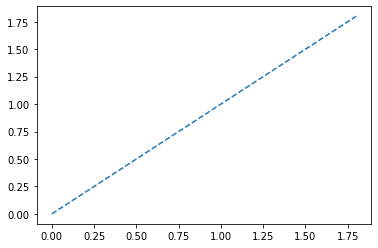

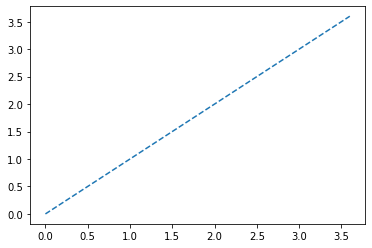

In [5]:
ejex2=np.arange(0,2,0.2)
ejey2=np.arange(0,2,0.2)
ejex4=np.arange(0,4,0.4)
ejey4=np.arange(0,4,0.4)
plt.plot(ejex2,ejey2, "--")
plt.show()
plt.plot(ejex4,ejey4, "--")

## 2. Machine Learning con algoritmo de regresión lineal

### Fit_intercept = True and normalize = False (values by default)

In [6]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = LinearRegression(fit_intercept=True, normalize=False).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLineal = np.mean(avg_result_g)
resultadoRegresionLineal_v_0 = np.mean(avg_result_v_0)

Media
29.342439790387537
266.82765037397235


### Fit_intercept = True and normalize = True

In [7]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = LinearRegression(fit_intercept=True, normalize=True).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))

Media
101.85545046433393
328.11725640414244


### Fit_intercept = False (normalize parameter is ignored when fit_intercept is set to False)

In [8]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = LinearRegression(fit_intercept=False).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))

Media
91.18734222213442
1837.8809214765736


### Representación gráfica de las variables g y v_0

Resultado g: 0.21571769900666013
Resultado v_0: 0.0993371793482522


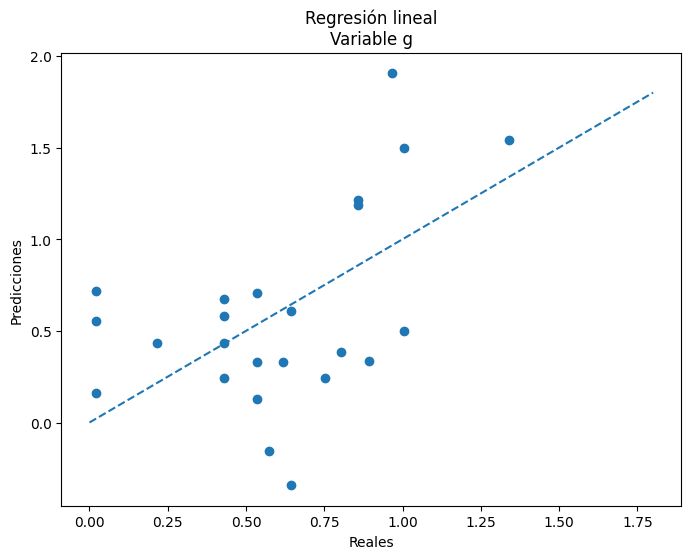

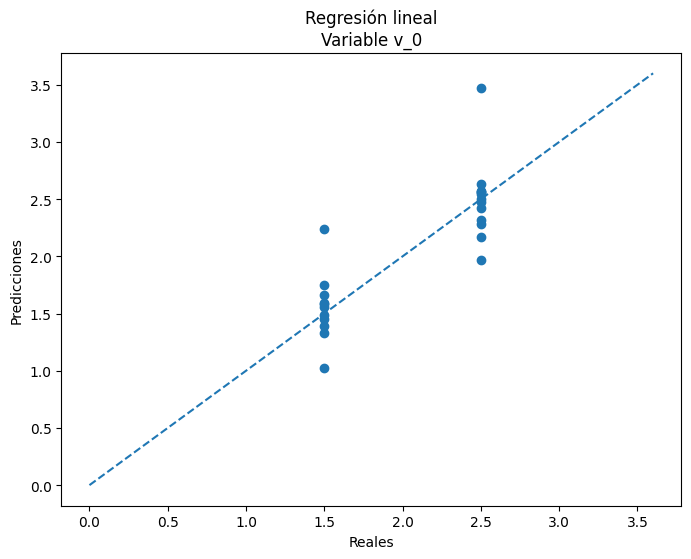

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = LinearRegression().fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
np.arange(0,2,0.2)
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [10]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = LinearRegression().fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealAC = np.mean(avg_result_g)
resultadoRegresionLinealAC_v_0 = np.mean(avg_result_v_0)

Media
9.094907066884655
8.18773247986331


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.16199049833668108
Resultado v_0: 0.04950340804780365


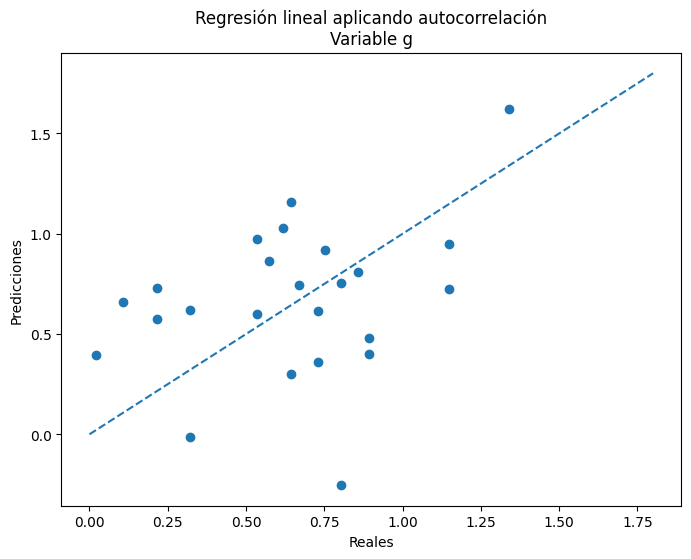

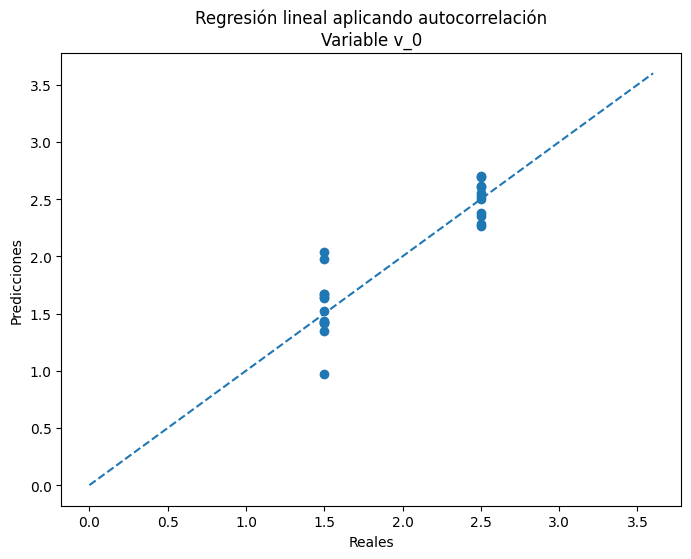

In [11]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)
    
X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = LinearRegression().fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión lineal aplicando autocorrelación\nVariable v_0")
plt.show()

# 3. ML Ridge

## 3.1 Machine Learning con algoritmo de regresión lineal de Ridge con alfa = 0.5

In [12]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=0.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge0_5 = np.mean(avg_result_g)
resultadoRegresionLinealRidge0_5_v_0 = np.mean(avg_result_v_0)

Media
0.48629044479074673
4.491303261916184


### Representación gráfica de las variables g y v_0

Resultado g: 0.11184510236884297
Resultado v_0: 0.6617902740544296


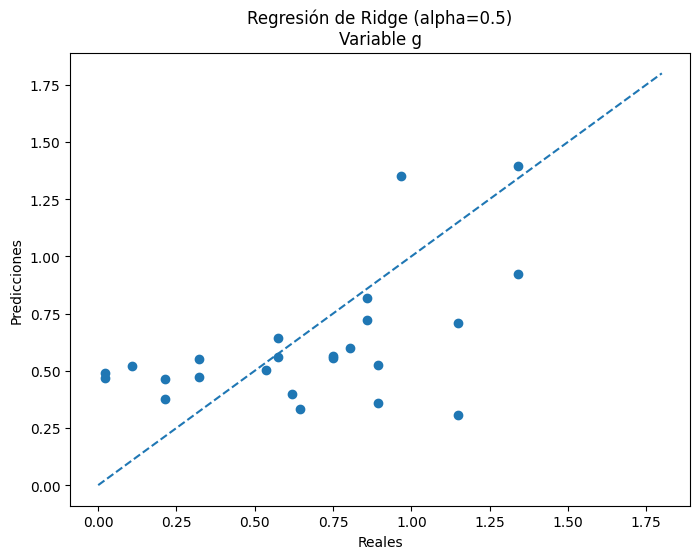

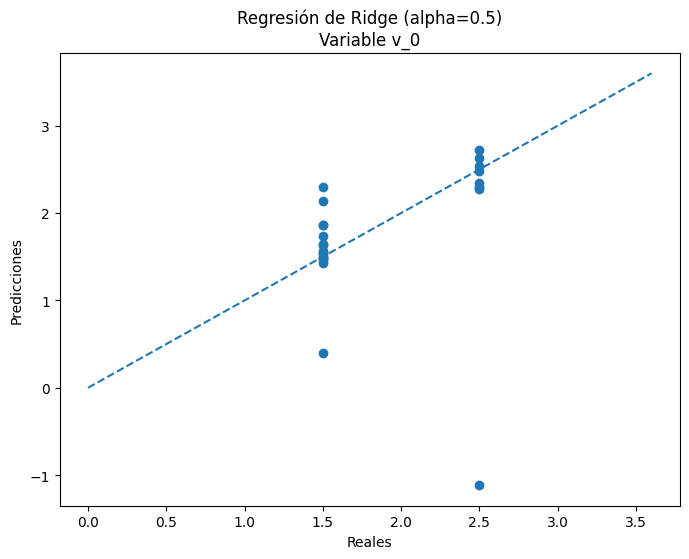

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=0.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=0.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=0.5)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [14]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=0.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge0_5AC = np.mean(avg_result_g)
resultadoRegresionLinealRidge0_5AC_v_0 = np.mean(avg_result_v_0)

Media
0.09049782413441808
0.07178894642228878


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.12042471295588564
Resultado v_0: 0.07778078948409425


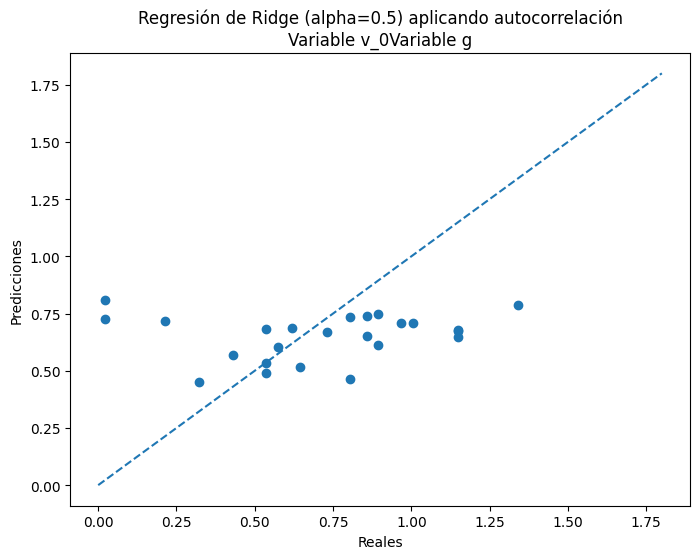

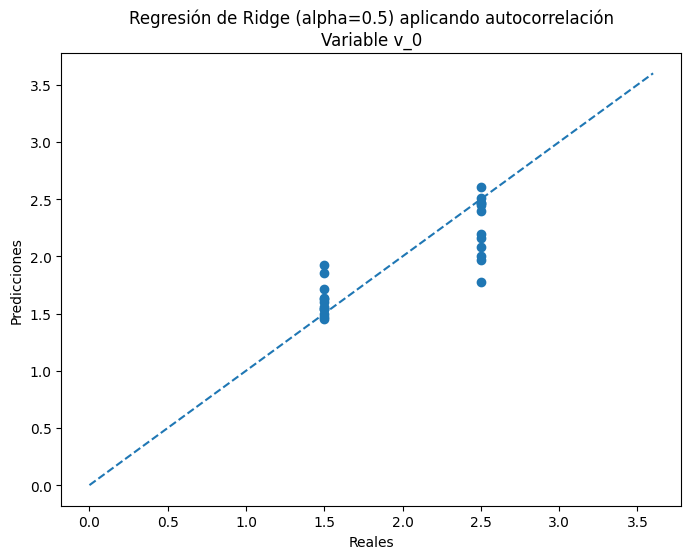

In [15]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=0.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=0.5) aplicando autocorrelación\nVariable v_0Variable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=0.5) aplicando autocorrelación\nVariable v_0")
plt.show()

## 3.2. Machine Learning con algoritmo de regresión lineal de Ridge con alfa = 1

In [16]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=1).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge1 = np.mean(avg_result_g)
resultadoRegresionLinealRidge1_v_0 = np.mean(avg_result_v_0)

Media
0.307416065881412
1.8780283109281966


### Representación gráfica de las variables g y v_0

Resultado g: 0.5373681627280664
Resultado v_0: 5.2656107847924565


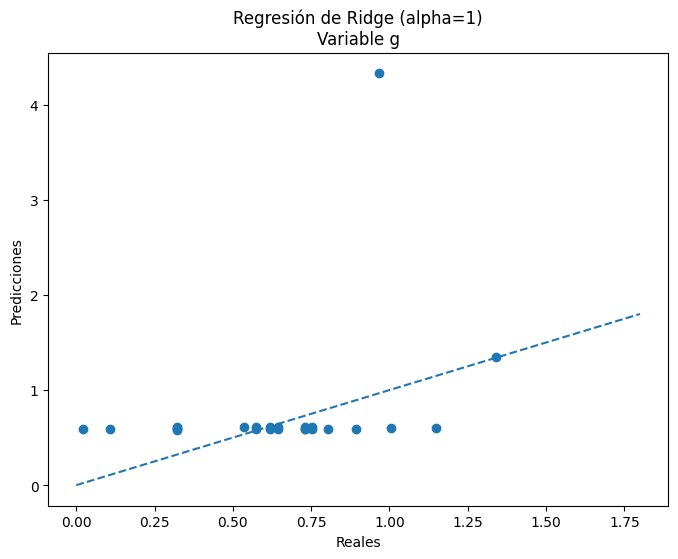

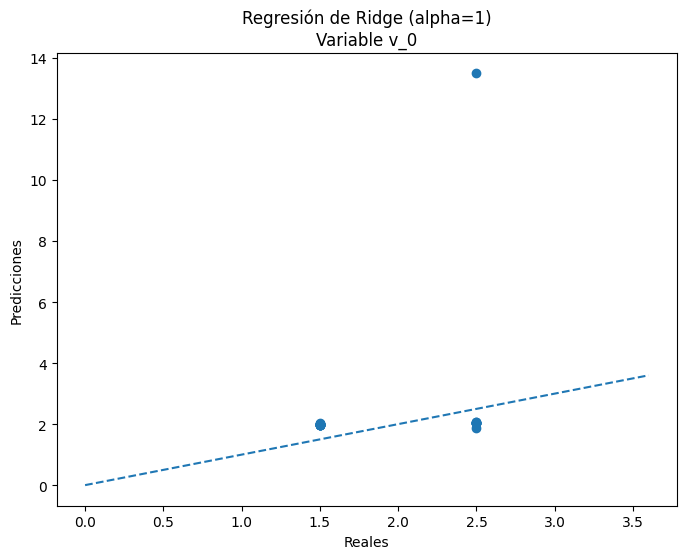

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=1).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [18]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=1).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge1AC = np.mean(avg_result_g)
resultadoRegresionLinealRidge1AC_v_0 = np.mean(avg_result_v_0)

Media
0.0900600471844133
0.06721845640652259


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.10465332941050305
Resultado v_0: 0.033492019214326284


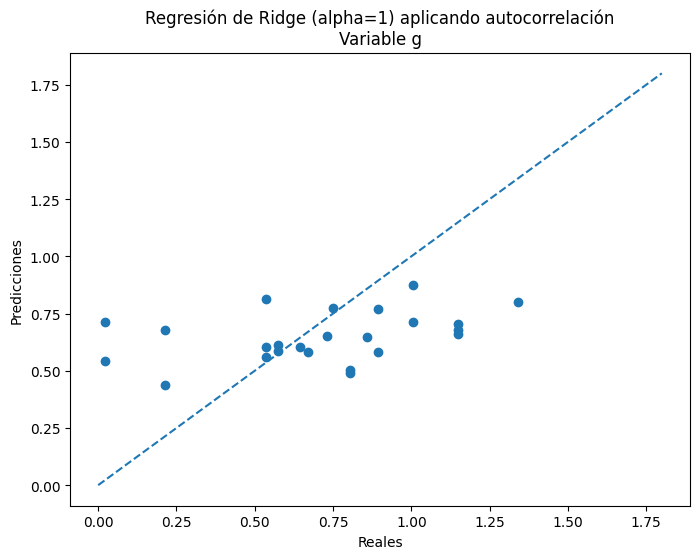

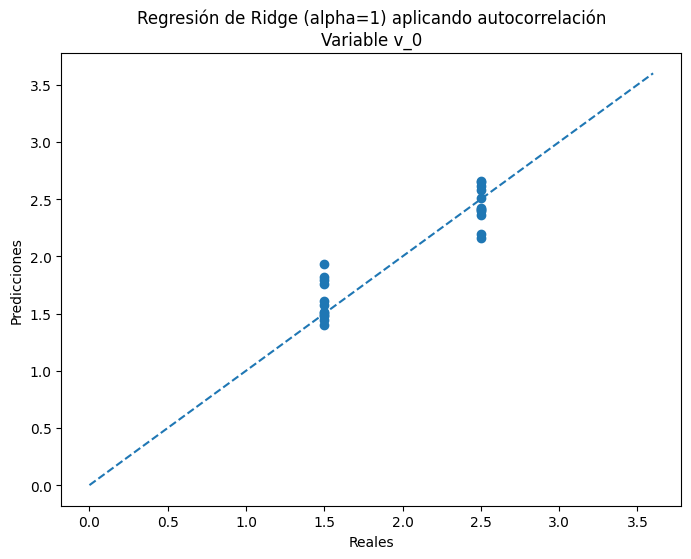

In [19]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=1).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1) aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1) aplicando autocorrelación\nVariable v_0")
plt.show()

## 3.3. Machine Learning con algoritmo de regresión lineal de Ridge con alfa = 1.5

In [20]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=1.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge1_5 = np.mean(avg_result_g)
resultadoRegresionLinealRidge1_5_v_0 = np.mean(avg_result_v_0)

Media
0.24088003537590108
1.0461032918946354


### Representación gráfica de las variables g y v_0

Resultado g: 0.161118762191535
Resultado v_0: 0.03506244624375693


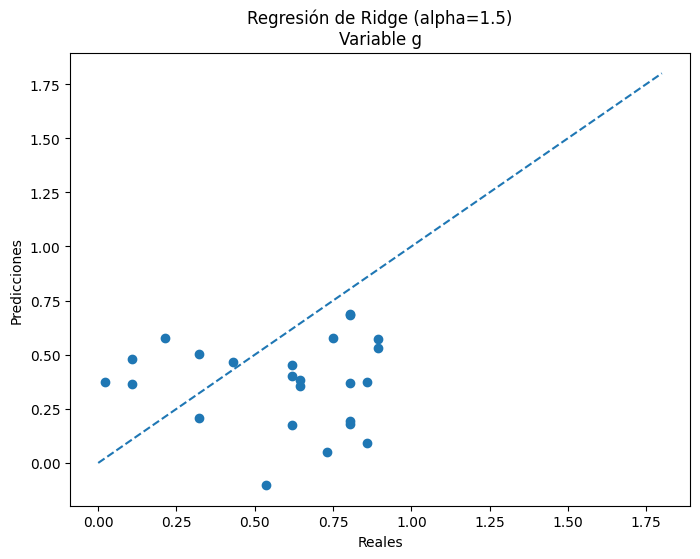

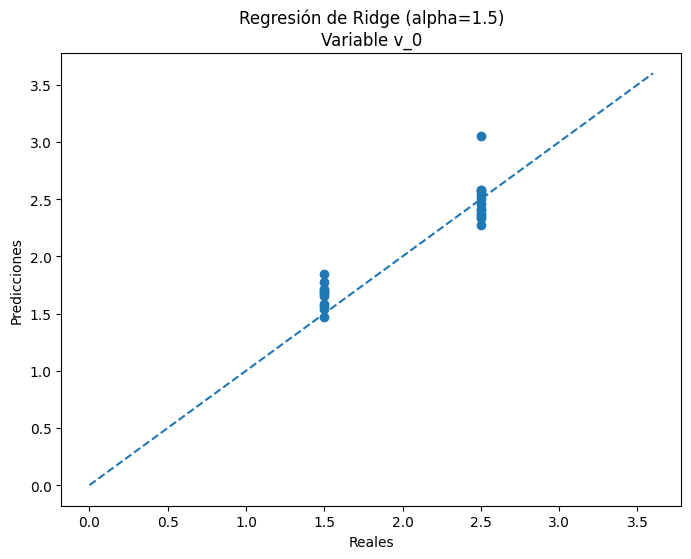

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=1.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1.5)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [22]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=1.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))   

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge1_5AC = np.mean(avg_result_g)
resultadoRegresionLinealRidge1_5AC_v_0 = np.mean(avg_result_v_0)

Media
0.09132690155332907
0.06637812968930419


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.07385223231530584
Resultado v_0: 0.05174606627915702


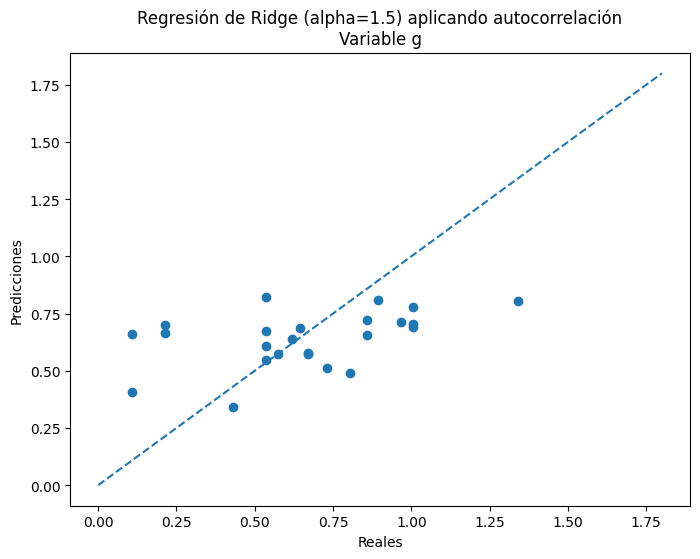

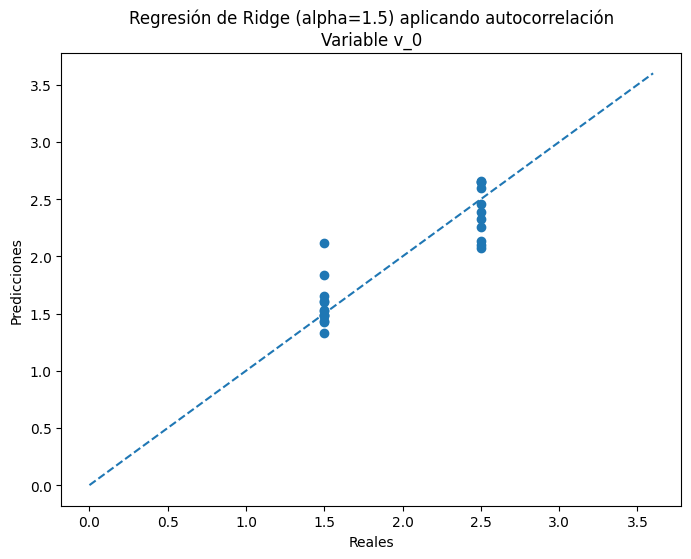

In [23]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=1.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1.5) aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=1.5) aplicando autocorrelación\nVariable v_0")
plt.show()

## 3.4. Machine Learning con algoritmo de regresión lineal de Ridge con alfa = 2

In [24]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=2).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge2 = np.mean(avg_result_g)
resultadoRegresionLinealRidge2_v_0 = np.mean(avg_result_v_0)

Media
0.19953957493318655
0.6194495900107664


### Representación gráfica de las variables g y v_0

Resultado g: 0.11487264558150485
Resultado v_0: 0.2764190247808528


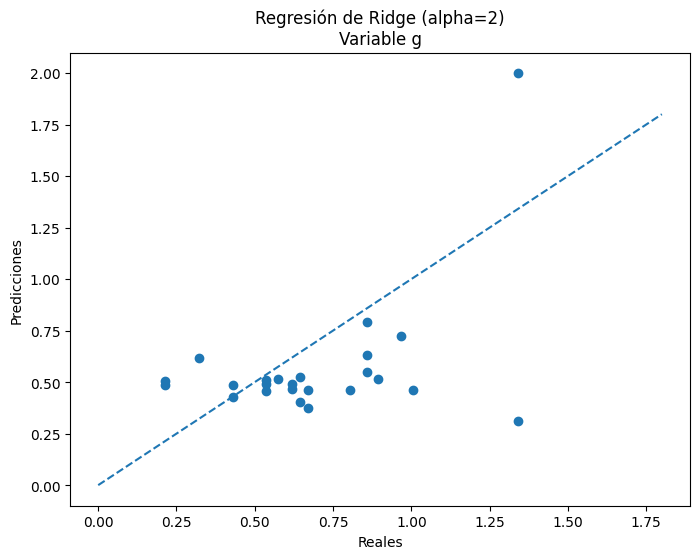

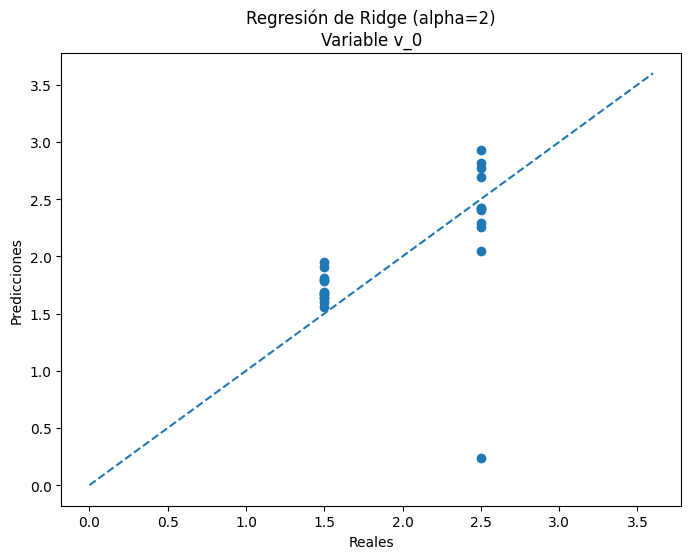

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=2).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=2)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=2)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [26]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Ridge(alpha=2).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealRidge2AC = np.mean(avg_result_g)
resultadoRegresionLinealRidge2AC_v_0 = np.mean(avg_result_v_0)

Media
0.0922620092609008
0.06588063315066481


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.07074674809164122
Resultado v_0: 0.06032728692266363


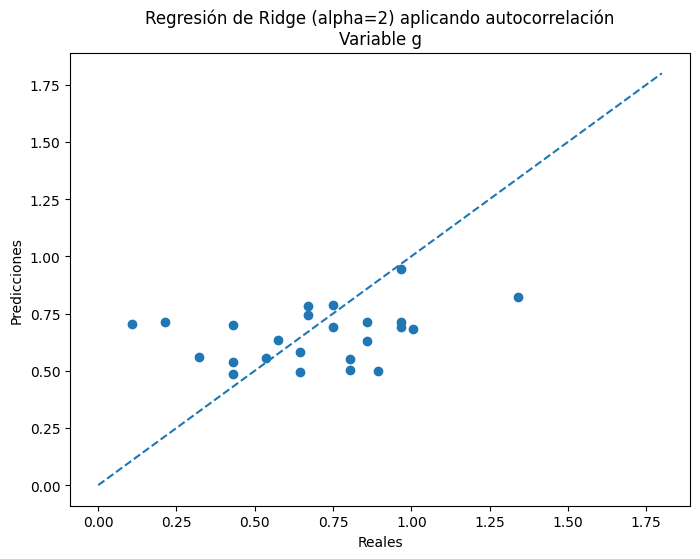

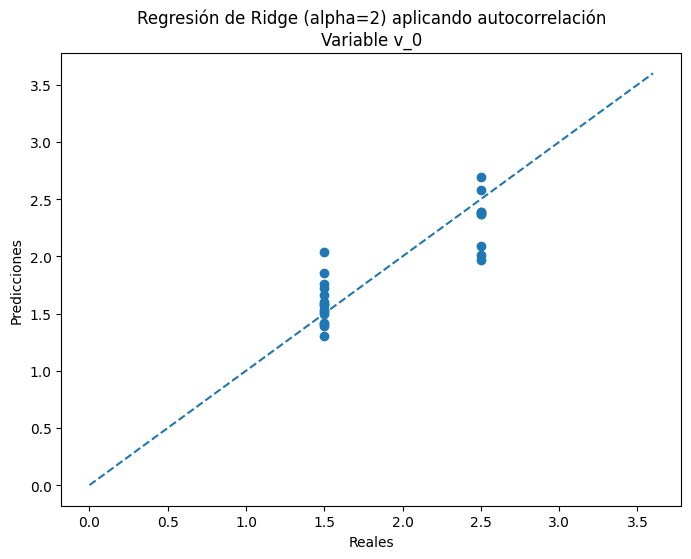

In [27]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Ridge(alpha=2).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=2) aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Ridge (alpha=2) aplicando autocorrelación\nVariable v_0")
plt.show()

## 3.5. Representación de Ridge variando alpha

In [28]:
comparativaRidge_g = []
comparativaRidge_v_0 = []
index = 0
for k in np.arange(0,3,0.2):
    k = round(k,3)
    ## Ejecutamos 1000 veces el algoritmo y obtenemos la media
    avg_result_g = []
    avg_result_v_0 = []
    for times in range (10):
        for fold in range(10):
            #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
            X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

            #Escalado de la entrada
            scaler = MinMaxScaler()
            scaler.fit(X_train)
            X_test = scaler.fit_transform(X_test)
            X_train = scaler.transform(X_train)

            #Entrenamiento del modelo
            reg = Ridge(alpha=k).fit(X_train,y_train)

            #Predicciones
            y_pred = reg.predict(X_test)

            #Evaluacion del modelo
            avg_result_g.append(mean_squared_error(y_test[0], y_pred[0]))
            avg_result_v_0.append(mean_squared_error(y_test[1], y_pred[1]))            
            
    print("Alpha: "+str(k)+"\n->Media g: "+str(np.mean(avg_result_g))+"\n->Media v_0: "+str(np.mean(avg_result_v_0)))
    comparativaRidge_g.append(np.mean(avg_result_g))
    comparativaRidge_v_0.append(np.mean(avg_result_v_0))


Alpha: 0.0
->Media g: 162.29513531336704
->Media v_0: 13.710123752304403
Alpha: 0.2
->Media g: 28.910664625381568
->Media v_0: 0.1647943152064706
Alpha: 0.4
->Media g: 0.4258606178734906
->Media v_0: 7.114621614803984
Alpha: 0.6
->Media g: 6.445920813817415
->Media v_0: 2.458980710755702
Alpha: 0.8
->Media g: 1.161448304209667
->Media v_0: 2.5109587120228984
Alpha: 1.0
->Media g: 0.13658386959374938
->Media v_0: 0.19771867143120647
Alpha: 1.2
->Media g: 0.17135513933353105
->Media v_0: 0.11953285195868454
Alpha: 1.4
->Media g: 0.1014185918617214
->Media v_0: 0.11491407070639997
Alpha: 1.6
->Media g: 0.4108223342387505
->Media v_0: 0.356106072724021
Alpha: 1.8
->Media g: 0.5853991404800722
->Media v_0: 0.4754675908227329
Alpha: 2.0
->Media g: 1.944652361581849
->Media v_0: 0.8860390187850073
Alpha: 2.2
->Media g: 0.30700451118102307
->Media v_0: 0.8068268628680859
Alpha: 2.4
->Media g: 0.23937512035410372
->Media v_0: 0.88947096806653
Alpha: 2.6
->Media g: 0.25923834430871673
->Media v_

Text(0.5, 1.0, 'Comparativa Ridge para la variable g')

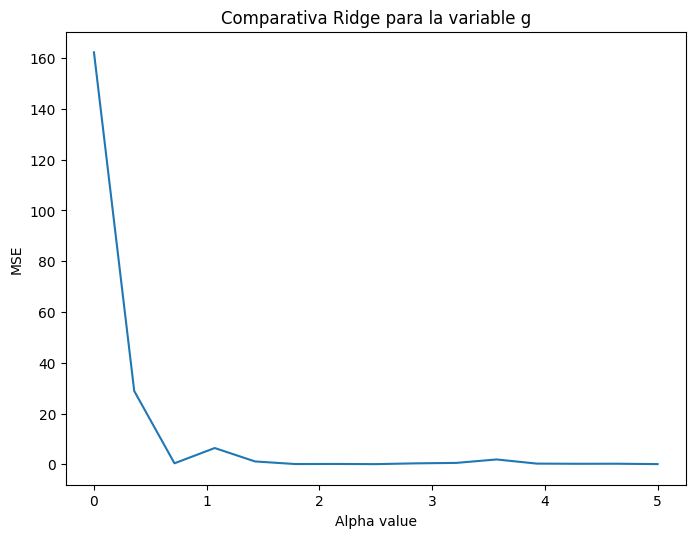

In [29]:
x = np.linspace(0, 5, len(comparativaRidge_g))
y = comparativaRidge_g
plt.figure(figsize=[8,6], dpi=100)
plt.plot(x,y)
plt.xlabel("Alpha value")
plt.ylabel("MSE")
plt.title("Comparativa Ridge para la variable g")

Text(0.5, 1.0, 'Comparativa Ridge para la variable v_0')

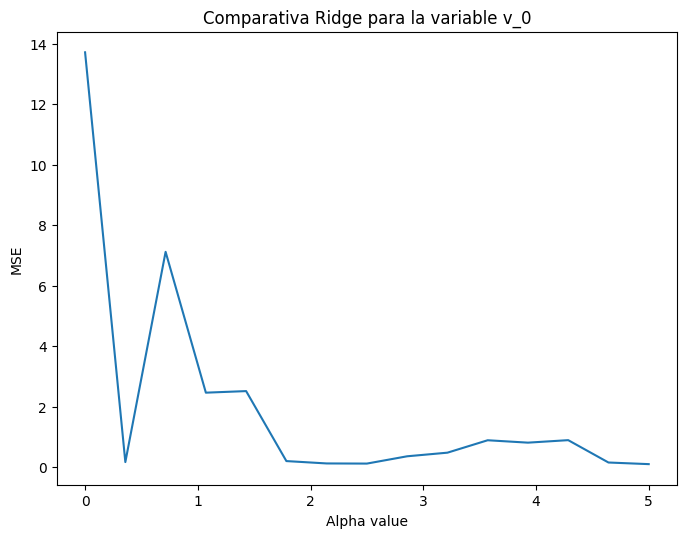

In [30]:
x = np.linspace(0, 5, len(comparativaRidge_v_0))
y = comparativaRidge_v_0
plt.figure(figsize=[8,6], dpi=100)
plt.plot(x,y)
plt.xlabel("Alpha value")
plt.ylabel("MSE")
plt.title("Comparativa Ridge para la variable v_0")

# 4. ML Lasso

## 4.1. Machine Learning con algoritmo de regresión lineal de Lasso alpha = 0.5

In [31]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=0.5).fit(X_train,y_train)
    
        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso0_5 = np.mean(avg_result_g)
resultadoRegresionLinealLasso0_5_v_0 = np.mean(avg_result_v_0)

Media
0.10918447999134887
0.25425944835767306


### Representación gráfica de la variable g y v_0

Resultado g: 0.12472933048859307
Resultado v_0: 0.2557769343519551


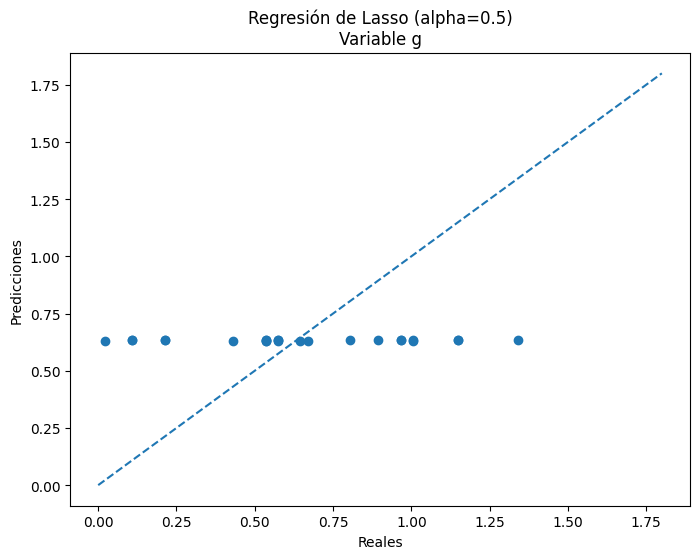

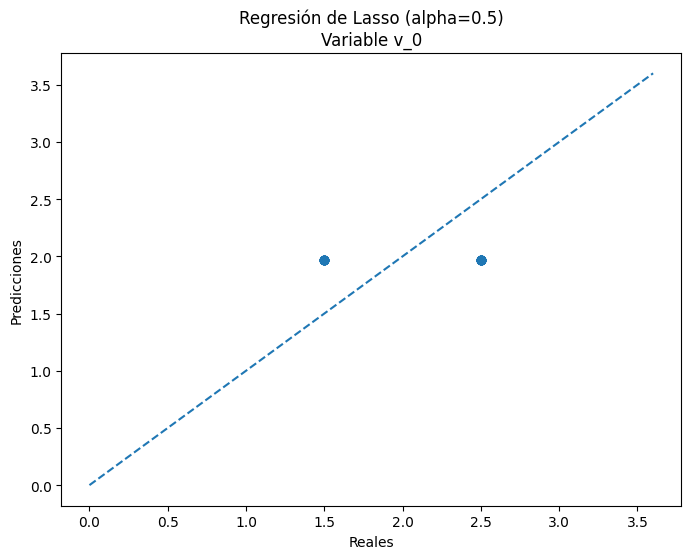

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=0.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=0.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=0.5)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [33]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=0.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso0_5AC = np.mean(avg_result_g)
resultadoRegresionLinealLasso0_5AC_v_0 = np.mean(avg_result_v_0)

Media
0.10885096128617167
0.254427734375


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.06728373080380846
Resultado v_0: 0.25097656249999994


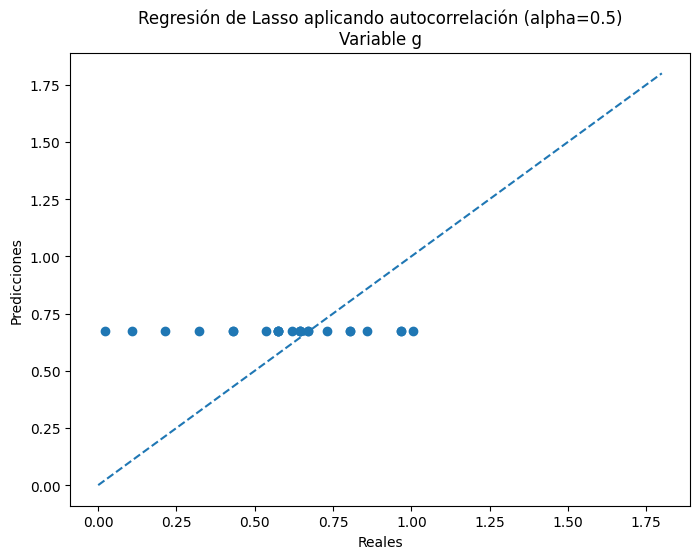

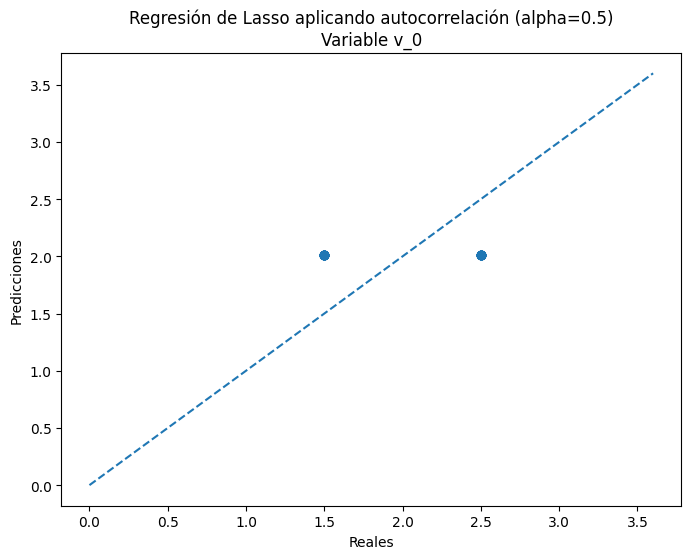

In [34]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=0.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=0.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=0.5)\nVariable v_0")
plt.show()

## 4.2. Machine Learning con algoritmo de regresión lineal de Lasso alpha = 1

In [35]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=1).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))      

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso1 = np.mean(avg_result_g)
resultadoRegresionLinealLasso1_v_0 = np.mean(avg_result_v_0)

Media
0.10974684772477064
0.25489638520934493


### Representaciçon gráfica de las variable g y v_0

Resultado g: 0.1327713301811602
Resultado v_0: 0.2509765625


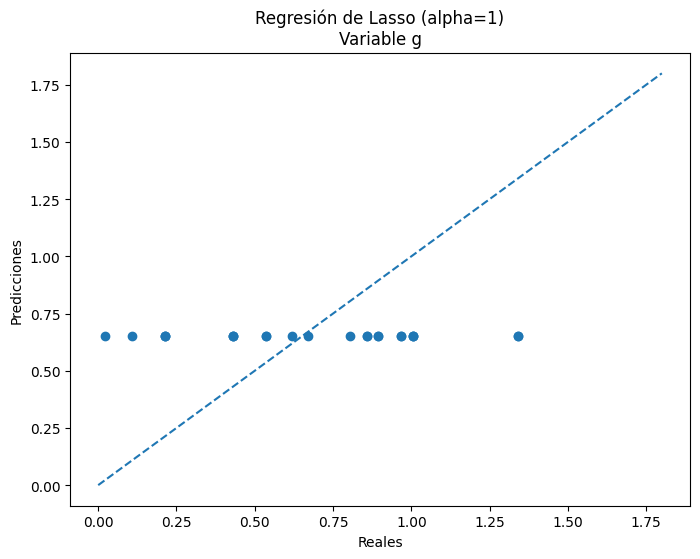

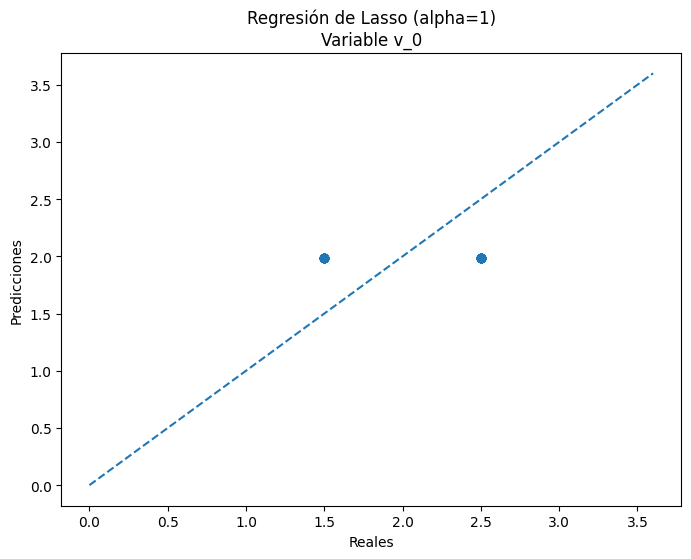

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=1).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=1)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=1)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [37]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=1).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))      
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso1AC = np.mean(avg_result_g)
resultadoRegresionLinealLasso1AC_v_0 = np.mean(avg_result_v_0)

Media
0.10980024105308847
0.2549287109375


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.058686801862538905
Resultado v_0: 0.25


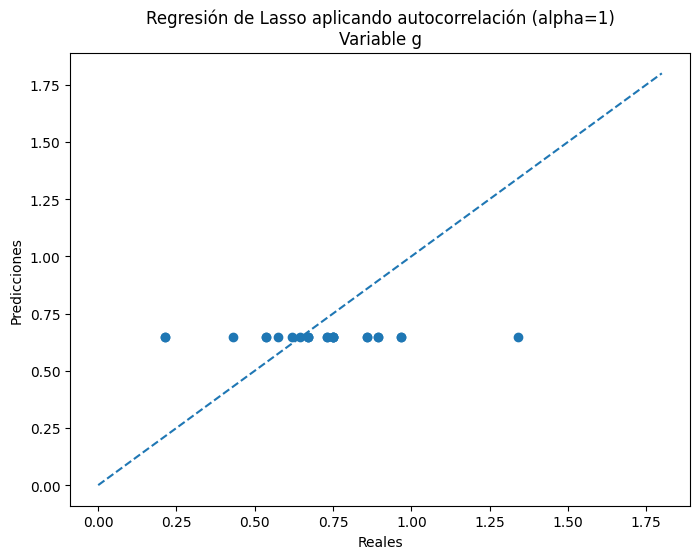

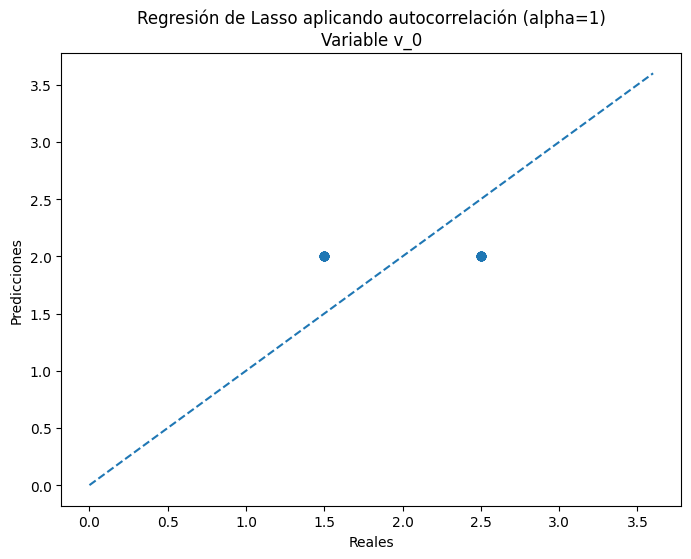

In [38]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=0.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=1)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=1)\nVariable v_0")
plt.show()

## 4.3. Machine Learning con algoritmo de regresión lineal de Lasso alpha = 1.5

In [39]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=1.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso1_5 = np.mean(avg_result_g)
resultadoRegresionLinealLasso1_5_v_0 = np.mean(avg_result_v_0)

Media
0.10887001710723578
0.254653032459595


### Representación gráfica de las variables g y v_0

Resultado g: 0.14682817810943574
Resultado v_0: 0.25097656249999994


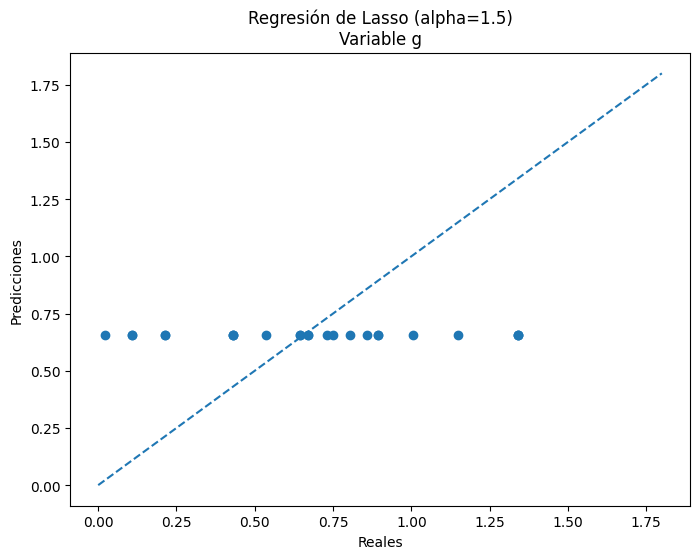

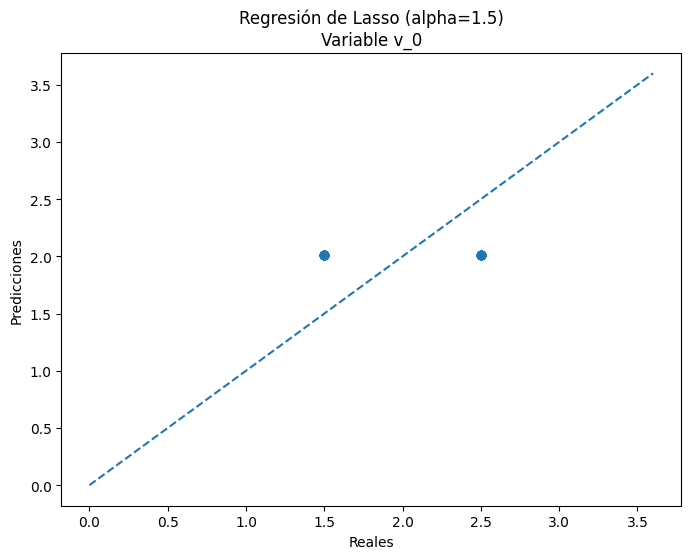

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=1.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=1.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=1.5)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [41]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=1.5).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso1_5AC = np.mean(avg_result_g)
resultadoRegresionLinealLasso1_5AC_v_0 = np.mean(avg_result_v_0)

Media
0.11050848092620348
0.2544599609375


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.143227099843941
Resultado v_0: 0.2587890625


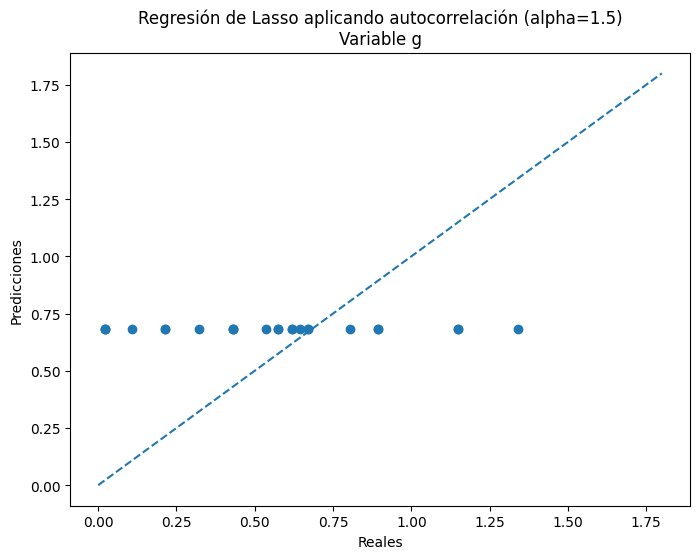

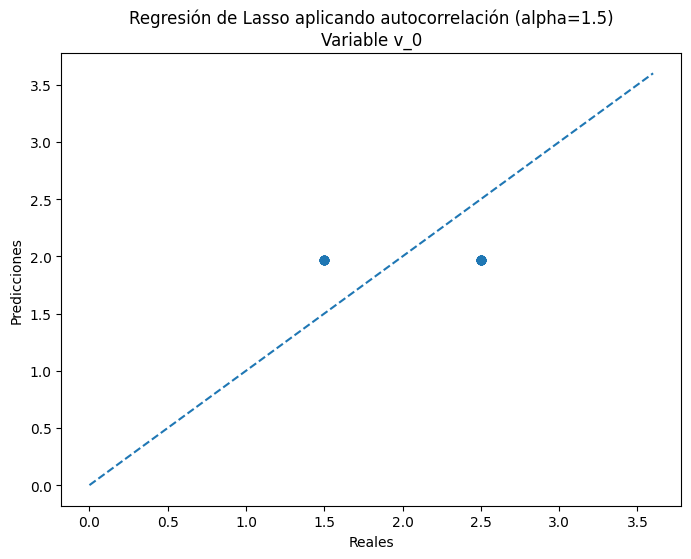

In [42]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=1.5).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=1.5)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=1.5)\nVariable v_0")
plt.show()

## 4.4. Machine Learning con algoritmo de regresión lineal de Lasso alpha = 2

In [43]:
## Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=2).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso2 = np.mean(avg_result_g)
resultadoRegresionLinealLasso2_v_0 = np.mean(avg_result_v_0)

Media
0.11075228822002706
0.254441257932779


### Representación gráfica de las variables g y v_0

Resultado g: 0.07844281347172938
Resultado v_0: 0.2508378807202653


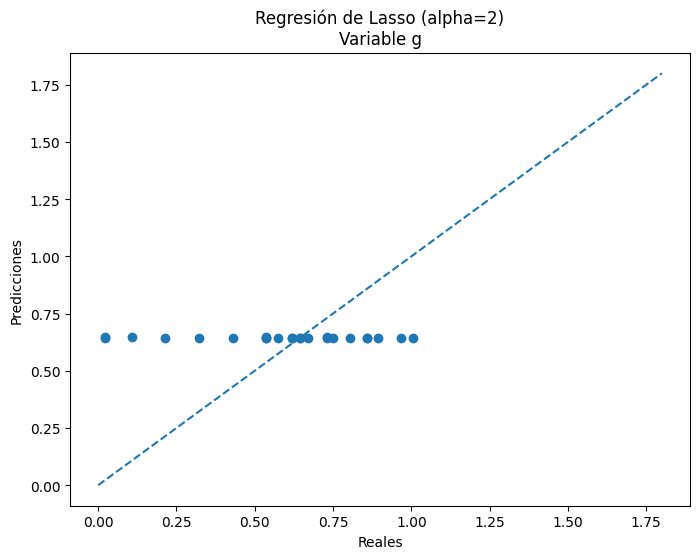

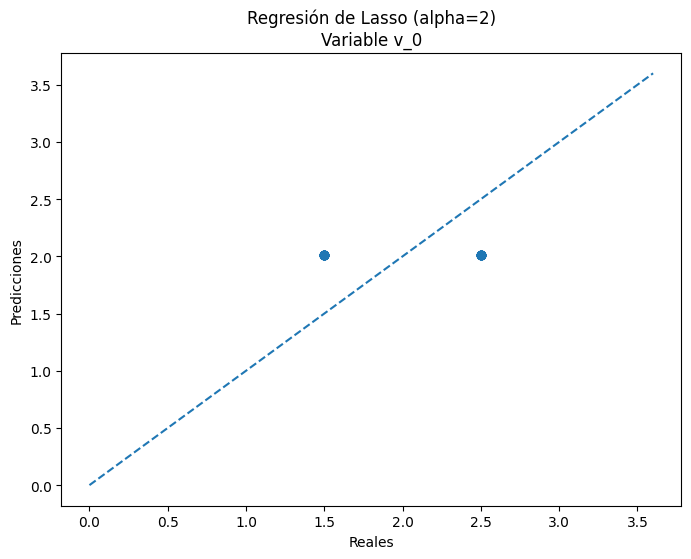

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=2).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=2)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso (alpha=2)\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [45]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        reg = Lasso(alpha=2).fit(X_train,y_train)

        #Predicciones
        y_pred = reg.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRegresionLinealLasso2AC = np.mean(avg_result_g)
resultadoRegresionLinealLasso2AC_v_0 = np.mean(avg_result_v_0)

Media
0.10910189567951029
0.254802734375


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.12184160107252684
Resultado v_0: 0.25097656249999994


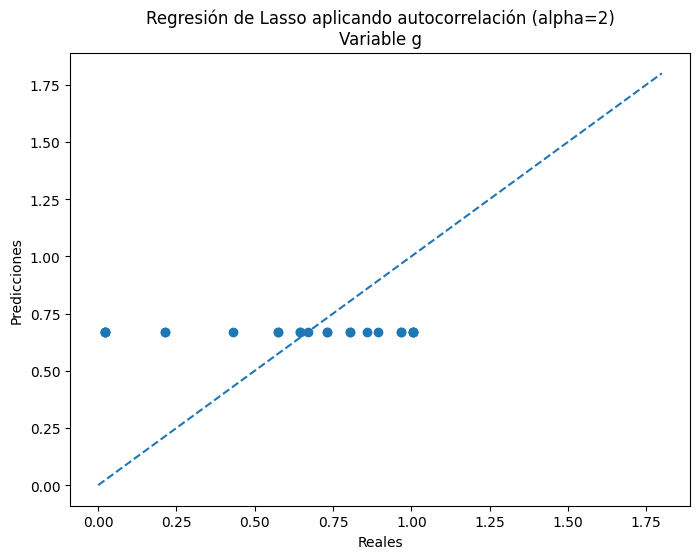

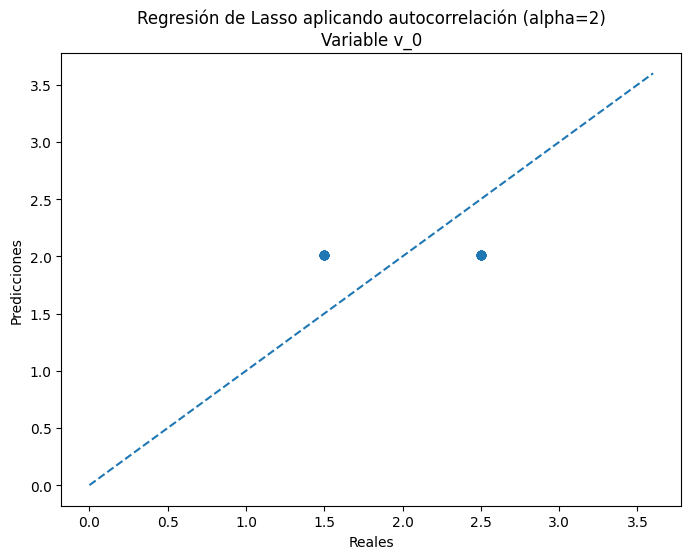

In [46]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
reg = Lasso(alpha=2).fit(X_train,y_train)

#Predicciones
y_pred = reg.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=2)\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión de Lasso aplicando autocorrelación (alpha=2)\nVariable v_0")
plt.show()

## 4.5. Comparativa de resultados variando alpha

In [47]:
comparativaLasso_g = []
comparativaLasso_v_0 = []
index = 0
for k in np.arange(0,0.2,0.02):
    k = round(k,3)
    ## Ejecutamos 1000 veces el algoritmo y obtenemos la media
    avg_result_g = []
    avg_result_v_0 = []
    for times in range (10):
        for fold in range(10):
            #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
            X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

            #Escalado de la entrada
            scaler = MinMaxScaler()
            scaler.fit(X_train)
            X_test = scaler.fit_transform(X_test)
            X_train = scaler.transform(X_train)

            #Entrenamiento del modelo
            reg = Lasso(alpha=k).fit(X_train,y_train)

            #Predicciones
            y_pred = reg.predict(X_test)

            #Evaluacion del modelo
            avg_result_g.append(mean_squared_error(y_test[0], y_pred[0]))
            avg_result_v_0.append(mean_squared_error(y_test[1], y_pred[1]))

    print("Alpha: "+str(k)+"\n->Media g: "+str(np.mean(avg_result_g))+"\n->Media v_0: "+str(np.mean(avg_result_v_0)))
    comparativaLasso_g.append(np.mean(avg_result_g))
    comparativaLasso_v_0.append(np.mean(avg_result_v_0))


Alpha: 0.0
->Media g: 12.859059842677386
->Media v_0: 5.330953997019696
Alpha: 0.02
->Media g: 0.16127669444829074
->Media v_0: 0.1409719045840748
Alpha: 0.04
->Media g: 0.1845415030102815
->Media v_0: 0.17323055733038958
Alpha: 0.06
->Media g: 0.1788367484044902
->Media v_0: 0.1764626398719604
Alpha: 0.08
->Media g: 0.17291350690622814
->Media v_0: 0.185800000941458
Alpha: 0.1
->Media g: 0.17985118721555232
->Media v_0: 0.17770936051670666
Alpha: 0.12
->Media g: 0.17108778510316136
->Media v_0: 0.19370170782748752
Alpha: 0.14
->Media g: 0.19185802177663386
->Media v_0: 0.178666060911645
Alpha: 0.16
->Media g: 0.17541755923969016
->Media v_0: 0.18356247354845892
Alpha: 0.18
->Media g: 0.19165223607218426
->Media v_0: 0.18113040130564403


Text(0.5, 1.0, 'Comparativa Lasso para la variable g')

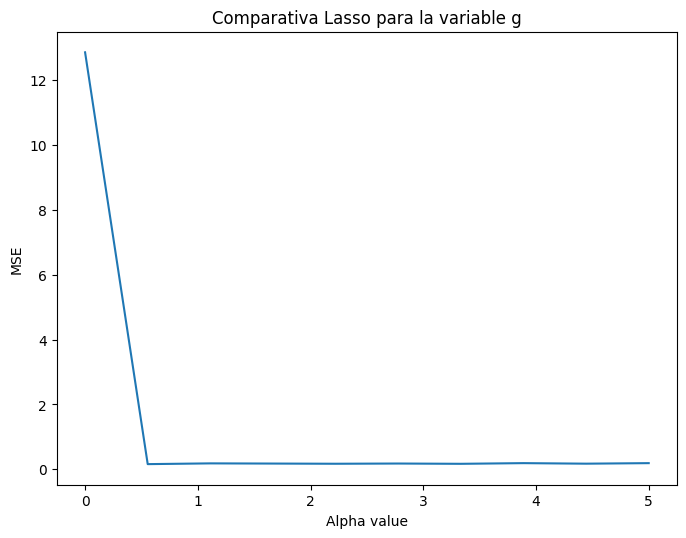

In [48]:
x = np.linspace(0, 5, len(comparativaLasso_g))
y = comparativaLasso_g
plt.figure(figsize=[8,6], dpi=100)
plt.plot(x,y)
plt.xlabel("Alpha value")
plt.ylabel("MSE")
plt.title("Comparativa Lasso para la variable g")

Text(0.5, 1.0, 'Comparativa Lasso para la variable v_0')

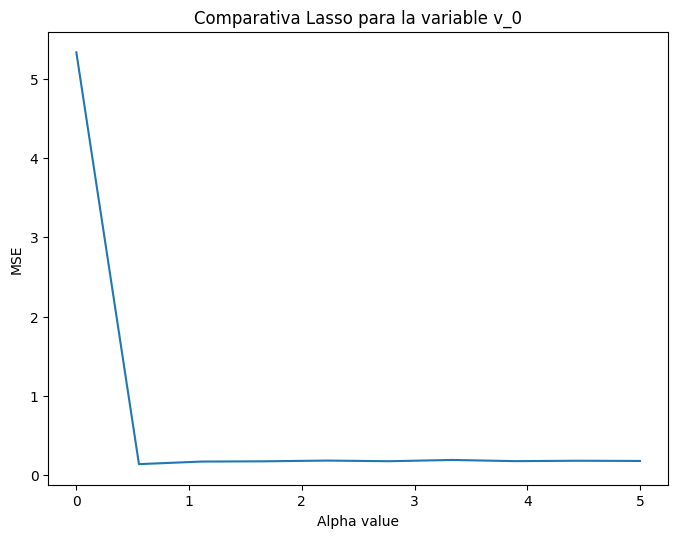

In [49]:
x = np.linspace(0, 5, len(comparativaLasso_v_0))
y = comparativaLasso_v_0
plt.figure(figsize=[8,6], dpi=100)
plt.plot(x,y)
plt.xlabel("Alpha value")
plt.ylabel("MSE")
plt.title("Comparativa Lasso para la variable v_0")

# 5. Algoritmos no lineales
## 5.1 Machine Learning con algoritmo no lineal de k-Nearest neightbour

In [50]:
#Ejecutamos 1000 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)        

        #Predicciones
        y_pred = knn.predict(X_test)
    
        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoKNeighbors = np.mean(avg_result_g)
resultadoKNeighbors_v_0 = np.mean(avg_result_v_0)

Media
0.09355986220052537
0.015371598639455784


### Representación gráfica de las variables g y v_0

Resultado g: 0.08800329604168637
Resultado v_0: 0.003401360544217689


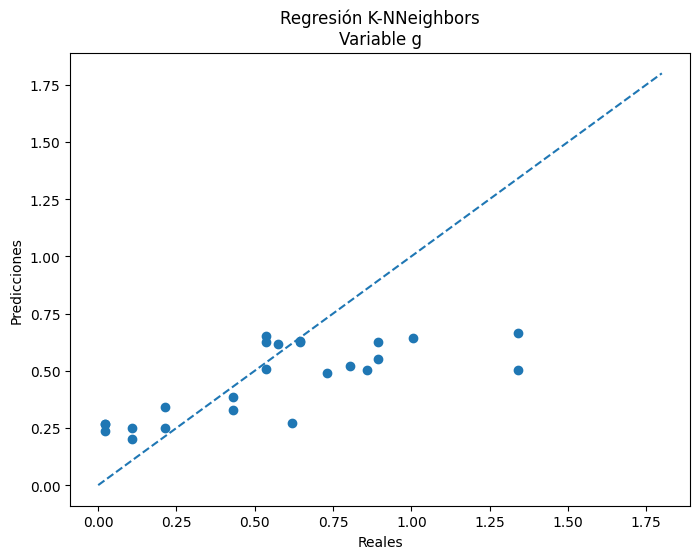

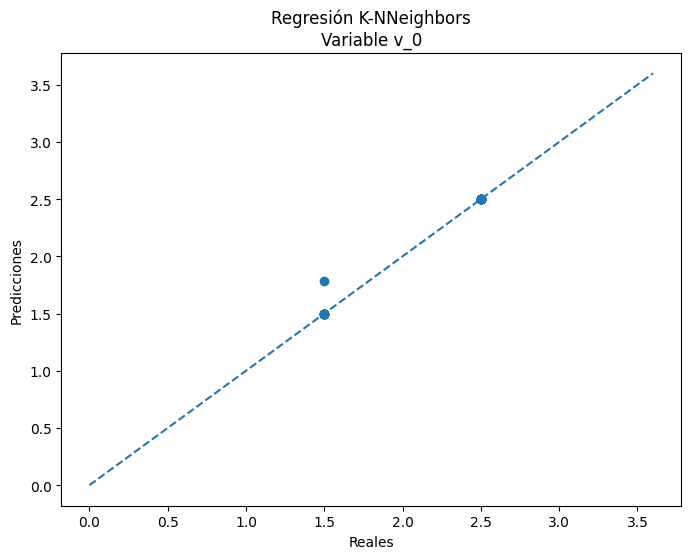

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)        

#Predicciones
y_pred = knn.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión K-NNeighbors\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión K-NNeighbors\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [52]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (100):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)

        #Predicciones
        y_pred = knn.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoKNeighborsAC = np.mean(avg_result_g)
resultadoKNeighborsAC_v_0 = np.mean(avg_result_v_0)

Media
0.056643570834967294
0.03732738095238095


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

Resultado g: 0.05508526884564887
Resultado v_0: 0.025510204081632654


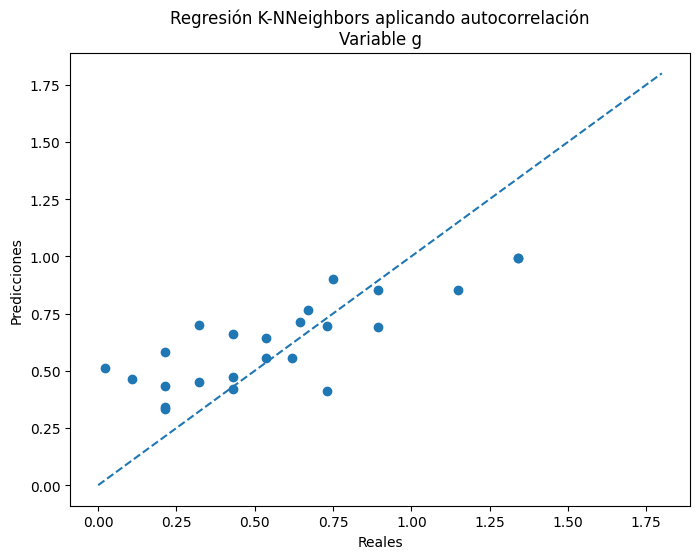

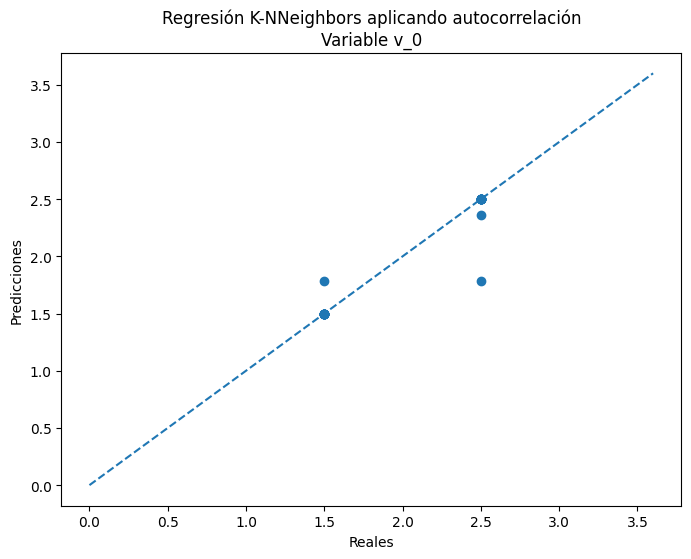

In [53]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)

#Predicciones
y_pred = knn.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión K-NNeighbors aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Regresión K-NNeighbors aplicando autocorrelación\nVariable v_0")
plt.show()

## 5.2 Machine Learning con algoritmo no lineal - red neuronal

In [54]:

def baseline_model(NN_units, NN_layers, X_shape1, Y_shape1):
    # create model
    model = Sequential()
    # Add input layer
    model.add(Dense(NN_units, input_dim=X_shape1, kernel_initializer='normal',
                                activation='relu'))
    # Add hidden layers
    for k in range(NN_layers):
        model.add(Dense(NN_units, kernel_initializer='normal',
                                activity_regularizer=l2(0.0001)))
        model.add(Activation('relu'))
    # Add output layer
    model.add(Dense(int(Y_shape1), kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')

    return model

In [55]:
#Ejecutamos 100 veces el algoritmo y obtenemos la media
avg_result_g = []
avg_result_v_0 = []
for times in range (10):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        nn = baseline_model(50, 2, len(X[0]),2)
        nn.fit(np.array(X_train), np.array(y_train))
        
        #Predicciones
        y_pred = nn.predict(X_test)
    
        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))

print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRedNeuronal = np.mean(avg_result_g)
resultadoRedNeuronal_v_0 = np.mean(avg_result_v_0)

1/1 [==============================] - 0s 60ms/step
Media
0.5248859983106833
4.10187072402242


### Representación gráfica de las variables g y v_0

1/1 [==============================] - 1s 539ms/step
Resultado g: 0.6562782619429132
Resultado v_0: 3.7387826234980786


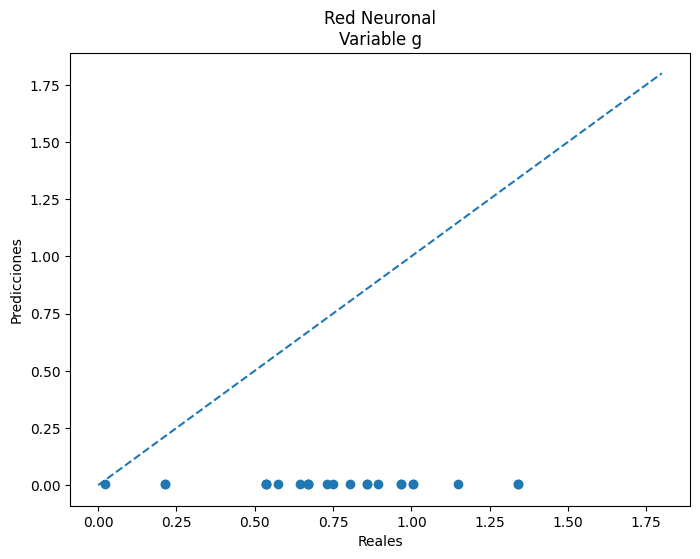

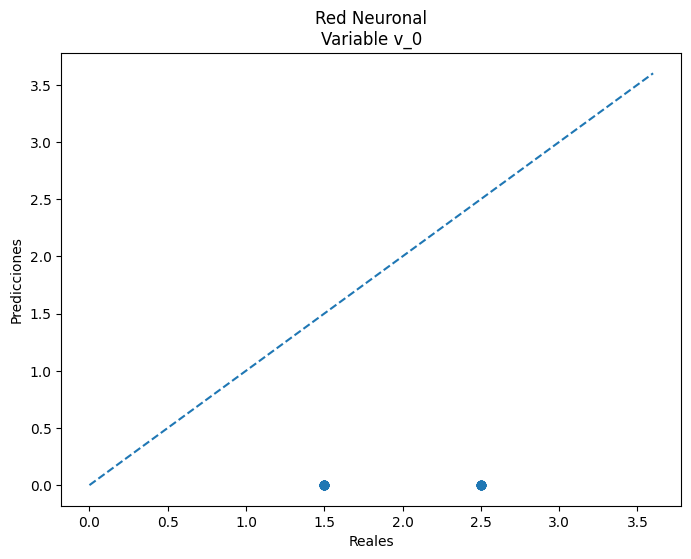

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
nn = baseline_model(2, 50, len(X[0]),2)
nn.fit(np.array(X_train), np.array(y_train))

#Predicciones
y_pred = nn.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Red Neuronal\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Red Neuronal\nVariable v_0")
plt.show()

### Aplicamos extracción de features mediante autocorrelacion

In [57]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

avg_result_g = []
avg_result_v_0 = []
for times in range (1):
    for fold in range(10):
        #Creamos nuestro X e y de entrada y los sets de entrenamiento y test.
        X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)
        
        #Escalado de la entrada
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_test = scaler.fit_transform(X_test)
        X_train = scaler.transform(X_train)

        #Entrenamiento del modelo
        nn = baseline_model(50, 2, len(X_transformed[0]),2)
        nn.fit(np.array(X_train), np.array(y_train))

        #Predicciones
        y_pred = nn.predict(X_test)

        #Evaluacion del modelo
        y_test_np = np.array(y_test)
        y_pred_np = np.array(y_pred)
        avg_result_g.append(mean_squared_error(y_test_np[:,0], y_pred_np[:,0]))
        avg_result_v_0.append(mean_squared_error(y_test_np[:,1], y_pred_np[:,1]))
        
print("Media")
print(np.mean(avg_result_g))
print(np.mean(avg_result_v_0))
resultadoRedNeuronalAC = np.mean(avg_result_g)
resultadoRedNeuronalAC_v_0 = np.mean(avg_result_v_0)

1/1 [==============================] - 0s 60ms/step
Media
0.5437307212228146
3.9427193029819163


### Representación gráfica de las variables g y v_0 después de aplicar autocorrelación

1/1 [==============================] - 0s 63ms/step
Resultado g: 0.44532407136872204
Resultado v_0: 4.1952451373312805


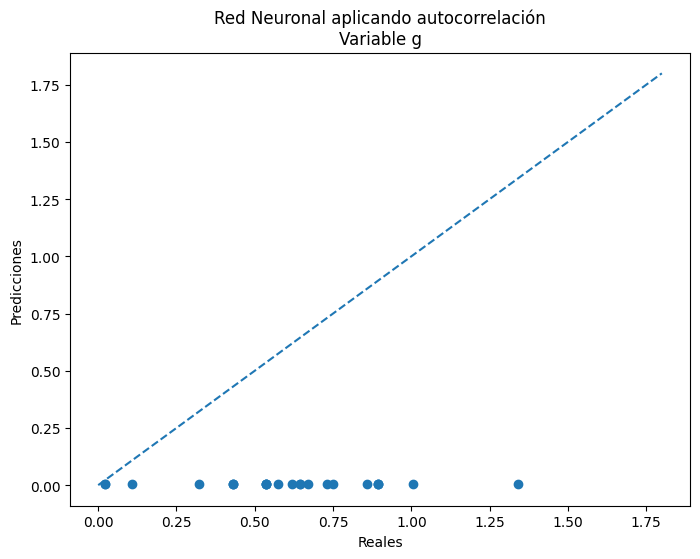

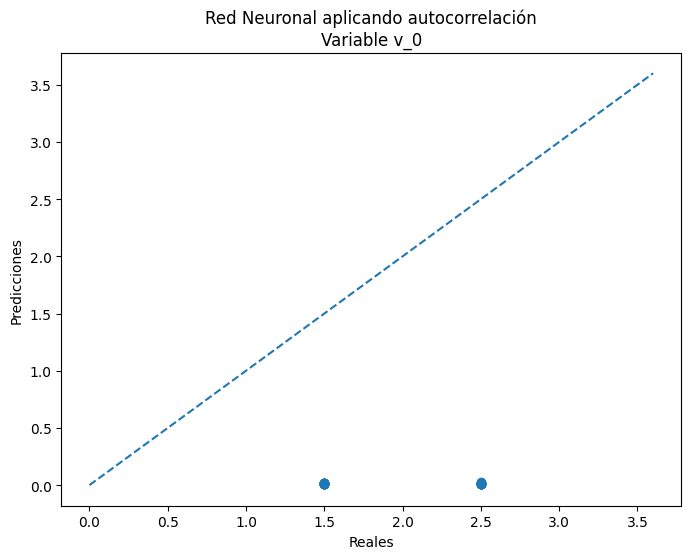

In [58]:
X_transformed = []

#Calculamos autocorrelaciones
for iter in range(120):
    autocorrX = sm.tsa.acf(X[iter])
    X_transformed.append(autocorrX)

X_train, X_test, y_train, y_test = train_test_split(X_transformed,Y, test_size=0.2)

#Escalado de la entrada
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

#Entrenamiento del modelo
nn = baseline_model(50, 2, len(X_transformed[0]),2)
nn.fit(np.array(X_train), np.array(y_train))

#Predicciones
y_pred = nn.predict(X_test)

#Evaluacion del modelo
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
result_g = mean_squared_error(y_test_np[:,0], y_pred_np[:,0])
result_v_0 = mean_squared_error(y_test_np[:,1], y_pred_np[:,1])
print("Resultado g: "+str(result_g))
print("Resultado v_0: "+str(result_v_0))
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,0],y_pred_np[:,0])
plt.plot(ejex2,ejey2, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Red Neuronal aplicando autocorrelación\nVariable g")
plt.show()
plt.figure(figsize=[8,6], dpi=100)
plt.scatter(y_test_np[:,1],y_pred_np[:,1])
plt.plot(ejex4,ejey4, "--")
plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.title("Red Neuronal aplicando autocorrelación\nVariable v_0")
plt.show()

# 6. Comparativa de resultados

### Todos los resultados 

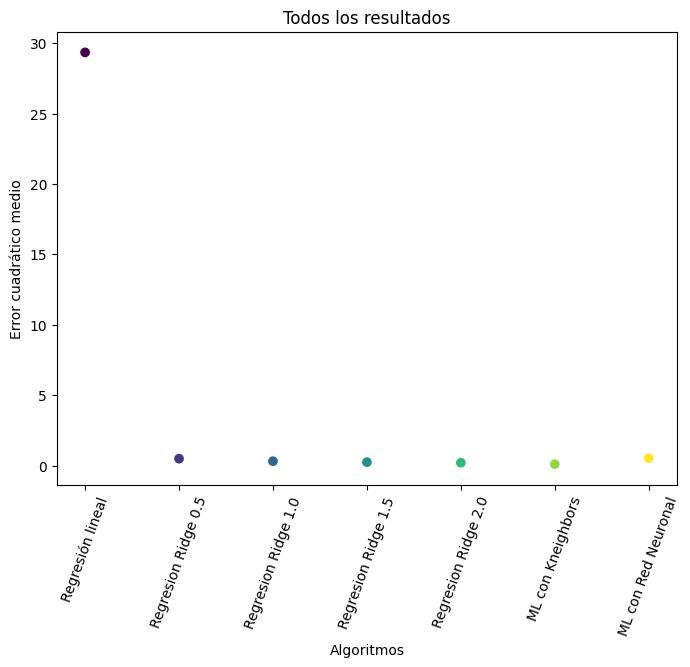

In [84]:
listaAlgoritmos = ['Regresión lineal', 'Regresion Ridge 0.5', 'Regresion Ridge 1.0', 'Regresion Ridge 1.5', 'Regresion Ridge 2.0', 'ML con Kneighbors', 'ML con Red Neuronal']
listaResultados = [resultadoRegresionLineal, resultadoRegresionLinealRidge0_5, resultadoRegresionLinealRidge1, resultadoRegresionLinealRidge1_5, resultadoRegresionLinealRidge2, resultadoKNeighbors, resultadoRedNeuronal]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(7)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 70)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Todos los resultados")
plt.show()

### Todos los resultados con autocorrelación

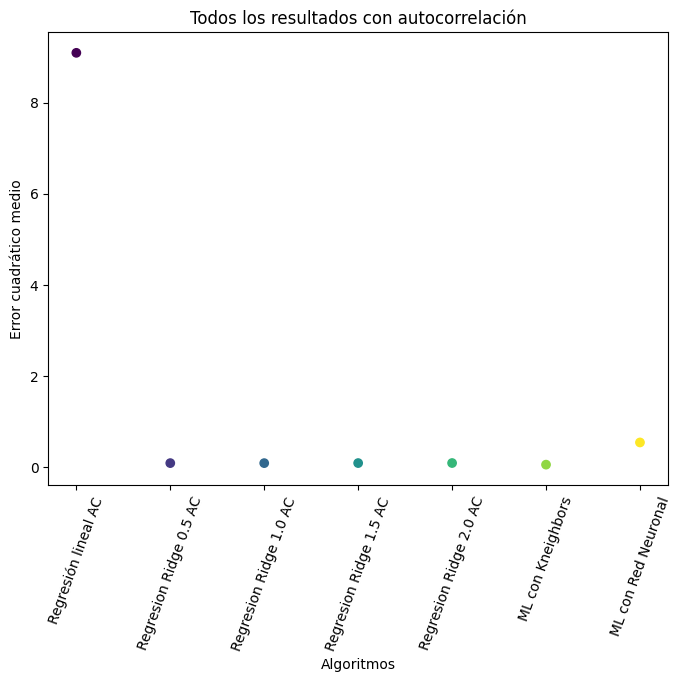

In [85]:
listaAlgoritmos = ['Regresión lineal AC', 'Regresion Ridge 0.5 AC', 'Regresion Ridge 1.0 AC', 'Regresion Ridge 1.5 AC', 'Regresion Ridge 2.0 AC', 'ML con Kneighbors', 'ML con Red Neuronal']
listaResultados = [resultadoRegresionLinealAC, resultadoRegresionLinealRidge0_5AC, resultadoRegresionLinealRidge1AC, resultadoRegresionLinealRidge1_5AC, resultadoRegresionLinealRidge2AC, resultadoKNeighborsAC, resultadoRedNeuronalAC]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(7)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 70)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Todos los resultados con autocorrelación")
plt.show()

### Todos los resultados sin regresión lineal simple

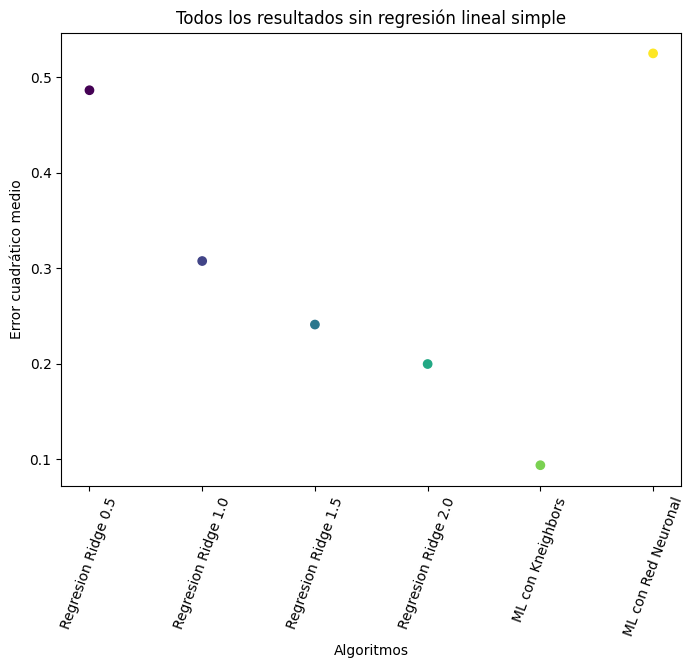

In [86]:
listaAlgoritmos = [ 'Regresion Ridge 0.5', 'Regresion Ridge 1.0','Regresion Ridge 1.5', 'Regresion Ridge 2.0', 'ML con Kneighbors', 'ML con Red Neuronal']
listaResultados = [ resultadoRegresionLinealRidge0_5, resultadoRegresionLinealRidge1, resultadoRegresionLinealRidge1_5, resultadoRegresionLinealRidge2, resultadoKNeighbors, resultadoRedNeuronal]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(6)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 70)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Todos los resultados sin regresión lineal simple")
plt.show()

### Todos los resultados sin regresión lineal simple con autocorrelación

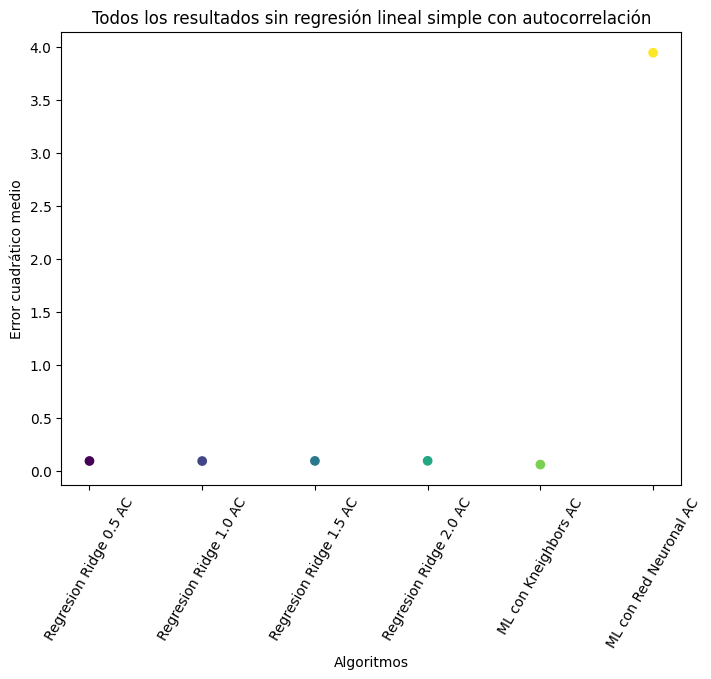

In [87]:
listaAlgoritmos = ['Regresion Ridge 0.5 AC', 'Regresion Ridge 1.0 AC', 'Regresion Ridge 1.5 AC', 'Regresion Ridge 2.0 AC', 'ML con Kneighbors AC', 'ML con Red Neuronal AC']
listaResultados = [resultadoRegresionLinealRidge0_5AC, resultadoRegresionLinealRidge1AC, resultadoRegresionLinealRidge1_5AC, resultadoRegresionLinealRidge2AC, resultadoKNeighborsAC, resultadoRedNeuronalAC_v_0]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(6)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 60)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Todos los resultados sin regresión lineal simple con autocorrelación")
plt.show()

### Mejores resultados

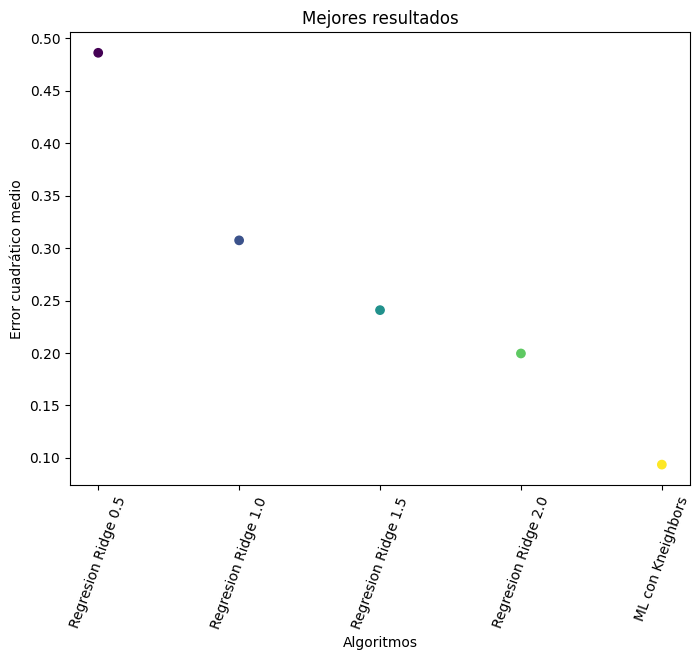

In [89]:
listaAlgoritmos = [ 'Regresion Ridge 0.5', 'Regresion Ridge 1.0','Regresion Ridge 1.5', 'Regresion Ridge 2.0', 'ML con Kneighbors']
listaResultados = [ resultadoRegresionLinealRidge0_5, resultadoRegresionLinealRidge1, resultadoRegresionLinealRidge1_5, resultadoRegresionLinealRidge2, resultadoKNeighbors]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(5)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 70)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Mejores resultados")
plt.show()

### Mejores resultados con autocorrelación

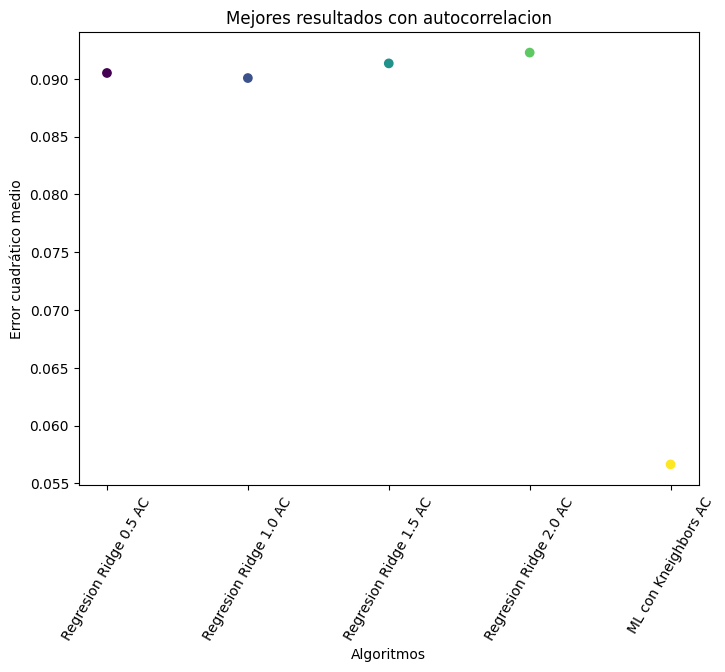

In [90]:
listaAlgoritmos = ['Regresion Ridge 0.5 AC', 'Regresion Ridge 1.0 AC', 'Regresion Ridge 1.5 AC', 'Regresion Ridge 2.0 AC', 'ML con Kneighbors AC']
listaResultados = [resultadoRegresionLinealRidge0_5AC, resultadoRegresionLinealRidge1AC, resultadoRegresionLinealRidge1_5AC, resultadoRegresionLinealRidge2AC, resultadoKNeighborsAC]

fig = plt.figure(figsize=[8,6], dpi=100)
fig = plt.figure(1)
ax = fig.add_subplot(111)
colors = np.arange(5)
plt.scatter(listaAlgoritmos,listaResultados, c=colors)
ax.set_xticklabels(listaAlgoritmos, rotation = 60)
plt.xlabel("Algoritmos")
plt.ylabel("Error cuadrático medio")
plt.title("Mejores resultados con autocorrelacion")
plt.show()